In [1]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt

In [3]:
datetime.datetime.now().strftime('%Y-%m-%d')

'2021-09-27'

In [3]:
evaluation_file = 'audio/wer/evaluation.csv'

In [5]:
row = dict()
row['date'] = pd.to_datetime('2021-09-27').date()
row['avg_wil'] = 1
row['avg_wer'] = 1
row['avg_mer'] = 1
row['med_wil'] = 1
row['med_wer'] = 1
row['med_mer'] = 1
current  = pd.DataFrame([row], columns=row.keys())

In [8]:
if os.path.isfile(evaluation_file):
    evaluation = pd.read_csv(evaluation_file, parse_dates = False)
    evaluation = pd.concat([evaluation, current], axis = 0)            
else:
    evaluation = current
evaluation.to_csv(evaluation_file, index = False)

In [9]:
evaluation

,date,avg_wil,avg_wer,avg_mer,med_wil,med_wer,med_mer
0,2021-09-26,0.624471,0.517267,0.453227,0.566308,0.451613,0.388889
0,2021-09-27,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
def send_report(evaluation, description):

    mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:gray']
    fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
    columns = evaluation.columns[1:]
    for i, column in enumerate(columns):
        plt.plot(evaluation.date.values, evaluation[column].values, lw=1.5, color=mycolors[i], label=column)
    plt.xticks(evaluation.date.values, rotation=60)
    plt.title(description+' error rate\nlower - better')
    plt.legend()
    plt.savefig('evaluation.png') 

In [16]:
evaluation.drop(['med_wil', 'med_wer', 'med_mer'], axis = 1, inplace = False)

,date,avg_wil,avg_wer,avg_mer
0,2021-09-26,0.624471,0.517267,0.453227
0,2021-09-27,1.000000,1.000000,1.000000


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


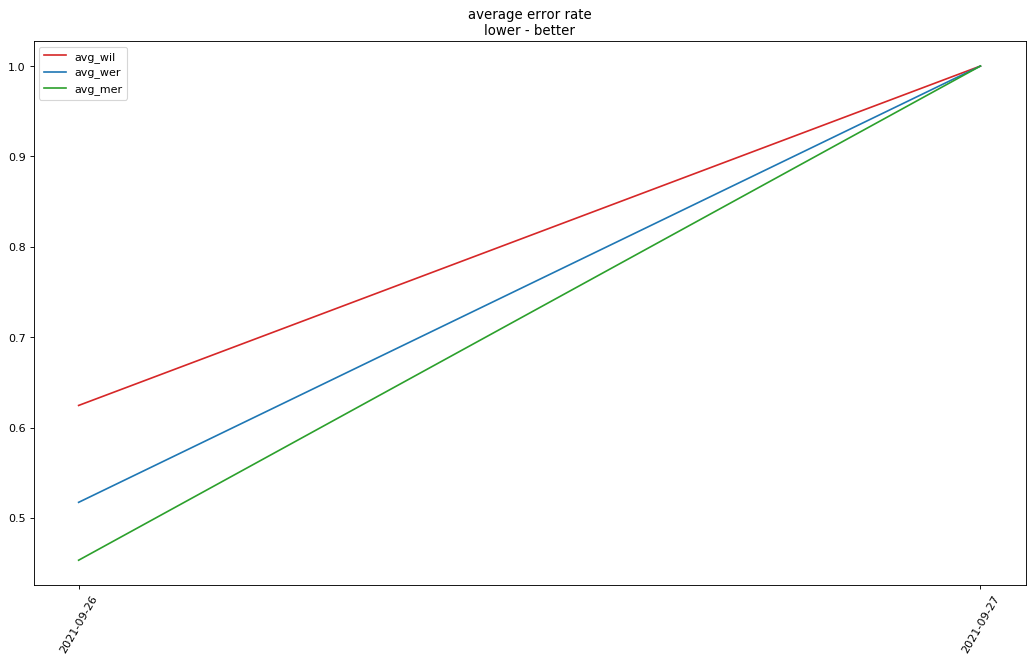

In [15]:
# plot and send
start_date = pd.to_datetime((datetime.datetime.now() + datetime.timedelta(days=-10)).strftime('%Y-%m-%d'))
evaluation.date = pd.to_datetime(evaluation.date)
evaluation = pd.DataFrame(evaluation[evaluation.date>start_date])
send_report(evaluation.drop(['med_wil', 'med_wer', 'med_mer'], 1), 'average')
#send_report(evaluation.drop(['avg_wil', 'avg_wer', 'avg_mer'], 1), 'median')

In [17]:
phrases = [
    'все сейчас а я тут при чем',
    'и здравствуйте юлия я хотела бы узнать те у нас забрали холодильник',
    'в пятницу поменять те холодильный шкаф',
    'вот здесь вот э но ведь танцы и телефон приёмного пункта я звоню там никто ничего не знает',
    'а девятьсот двадцать шесть шестьдесят семь сорок один шестьсот тринадцать шестьдесят семь сорок один'
]

In [21]:
numbers = [
    'надцать',
    'двадцать',
    'тридцать',
    'сорок',
    'пятьдесят',
    'шестьдесят',
    'семьдесят',
    'восемьдесят',
    'девяносто',
    'пятьсот',
    'шестьсот',
    'семьсот',
    'восемьсот',
    'девятьсот',
    'тысяч'
]

In [18]:
' '.join(phrases)

'все сейчас а я тут при чем и здравствуйте юлия я хотела бы узнать те у нас забрали холодильник в пятницу поменять те холодильный шкаф вот здесь вот э но ведь танцы и телефон приёмного пункта я звоню там никто ничего не знает а девятьсот двадцать шесть шестьдесят семь сорок один шестьсот тринадцать шестьдесят семь сорок один'

In [22]:
for word in ' '.join(phrases).split(' '):
    if word in numbers:
        print(word)

девятьсот
двадцать
шестьдесят
сорок
шестьсот
шестьдесят
сорок
